In [463]:
using LinearAlgebra
using PyPlot
using DataFrames
using CSV

In [464]:
PyPlot.svg(true)

true

In [465]:
include("./src/tmat.jl")
include("./src/latt_para.jl")
include("./src/tmat_nlo.jl")

pole_NLO

# Physical setting

In [466]:
# average mass of baryons unit: GeV
mN = (938.272 + 939.566) / 2 
mΣ = (1189.37 + 1192.64 + 1197.45) / 3 
mΛ = 1115.68 
mΞ = (1314.8+1321.3) / 2 

# average mass of mesons unit: MeV
mKbar = (493.68 + 497.65) / 2 
mπ = (139.570*2 + 134.977) / 3
mK = mKbar 
mη = 547.51

a = [-2.0, -1.84, -2.25, -2.52]
mch = [[mπ, mΣ],[mKbar, mN], [mη, mΛ], [mK, mΞ]]

params = Dict(
    :mch => mch,
    :decons_vec => [92.4, 92.4, 92.4, 92.4] .* 1.123,
    :m_meson => (mπ, mK)
)
params[:threshold] = [sum(mch[i]) for i in 1:4]

4-element Vector{Float64}:
 1331.1923333333334
 1434.584
 1663.19
 1813.715

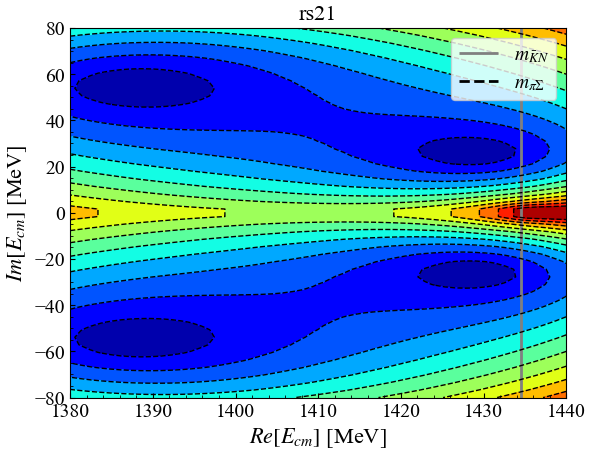

In [467]:
dim = 50
rew = range(1380, 1440, dim)
imw = range(-80, 80, dim)

fig, ax = PyPlot.subplots()
plot_tdet_LO!(ax, rew, imw, params, [-2., -2.], n=2)
gcf()

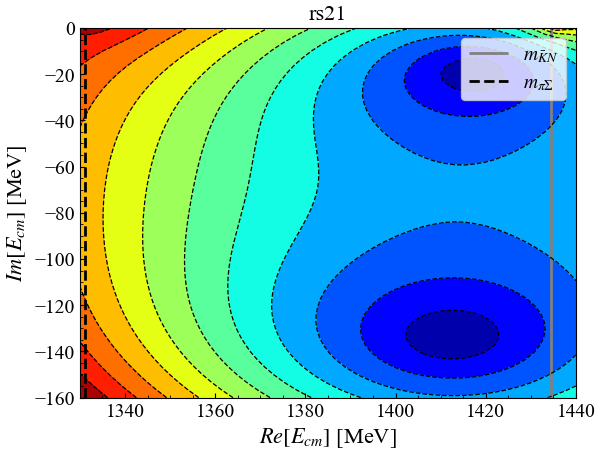

In [468]:
b = Dict(:b0 => -0.43e-3, :bD => 0.08e-3, :bF => -0.27e-3)
d = Dict(:d1 => -0.36e-3, :d2 => 0.09e-3, :d3 => 0.1e-3, :d4 => -0.59e-3)

dim = 50
rew = range(1330, 1440, dim)
imw = range(-160, 0, dim)

fig, ax = PyPlot.subplots()
plot_tdet_NLO(ax, rew, imw, params, a, b, d, n=4, rs="rs21")

gcf()

In [469]:
a2 = [-1.6, -2.2, -2.5, -2.9]
params1 = copy(params)
params1[:decons_vec] = [93.2, 108.2, 1.3*93.2, 108.2]
params1

Dict{Symbol, Any} with 4 entries:
  :m_meson    => (138.039, 495.665)
  :threshold  => [1331.19, 1434.58, 1663.19, 1813.71]
  :decons_vec => [93.2, 108.2, 121.16, 108.2]
  :mch        => [[138.039, 1193.15], [495.665, 938.919], [547.51, 1115.68], [4…

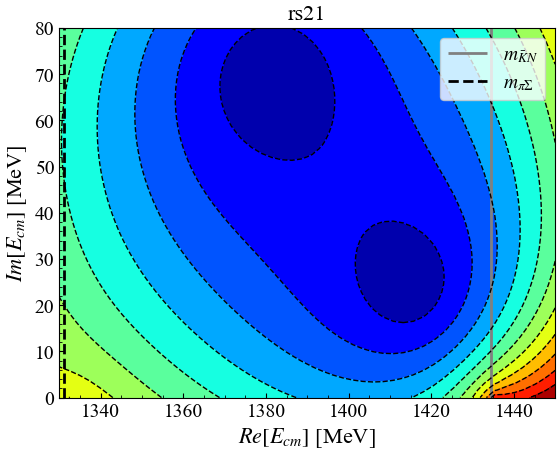

In [470]:
dim = 50
rew = range(1330, 1450, dim)
imw = range(0, 80, dim)

fig, ax = PyPlot.subplots()
plot_tdet_LO!(ax, rew, imw, params1, [-1.6,-2.24], n=2, μ_tuple=(630,))
gcf()

# Guo's result

In [471]:
guo_para = Dict(
    :mch => [(137.3, 1191.6), (495.6, 940.9), (547.9, 1111.5), (495.6, 1322.2) ],
    :decons_vec => [92.4, 112.7, 121.7, 112.7],
    :m_meson => (137.3, 495.6)
)
guo_a = [-0.7, -1.15, -1.21, -1.13]
guo_para[:threshold] = [sum(guo_para[:mch][i]) for i in 1:4]
#guo_para[:decons_vec] = [106.95, 106.95, 106.95, 106.95]
guo_para[:decons_vec] = [109.032, 109.032, 109.032, 109.032]

4-element Vector{Float64}:
 109.032
 109.032
 109.032
 109.032

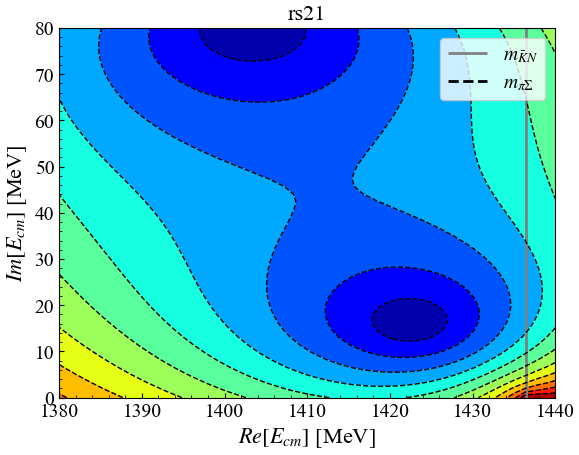

In [472]:
dim = 50
rew = range(1380, 1440, dim)
imw = range(-0, 80, dim)

fig, ax = PyPlot.subplots()
plot_tdet_LO!(ax, rew, imw, guo_para, guo_a, n=4, μ_tuple=(1191.6, 940.9, 1111.5, 1322.2))
gcf()

In [473]:
@doc plot_tdet_LO

Plot tdet in an complex energy plane to verify the position of pole


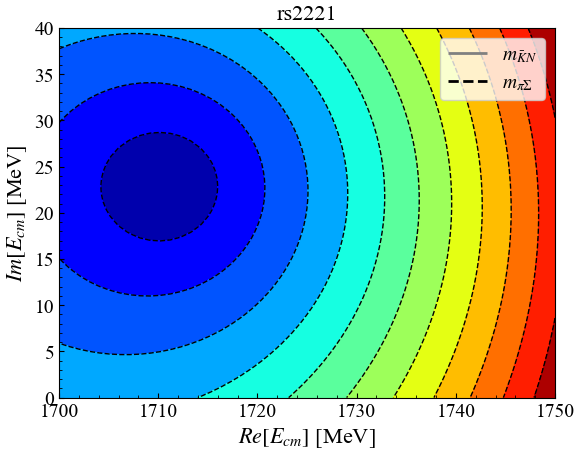

In [474]:
dim = 50
rew = range(1700, 1750, dim)
imw = range(-0, 40, dim)

fig, ax = PyPlot.subplots()
plot_tdet_LO(ax, rew, imw, guo_para, guo_a, n=4, rs="rs2221", μ_tuple=(1191.6, 940.9, 1111.5, 1322.2))
gcf()

In [475]:
pole_NLO([1417e0, -15.7], guo_para, guo_a, b, d, n=4, μ_tuple=(1191.6, 940.9, 1111.5, 1322.2) )

2-element Vector{Float64}:
 1416.27
  -16.46

In [476]:
pole_NLO([1417e0, -150.7], guo_para, guo_a, b, d, n=4, μ_tuple=(1191.6, 940.9, 1111.5, 1322.2) )

2-element Vector{Float64}:
 1418.09
 -165.41

# Hadrons masses from lattice setup

In [496]:
params = copy(latt_para)
f = 1.1999999988821624
fπ = 93

#params[:decons_vec] = [fπ fπ*f; fπ*f fπ]#[92.4, 92.4, 92.4, 92.4] .* 1.2
params[:decons_vec] = [fπ, 108e0, fπ*1.3, 108e0]

4-element Vector{Float64}:
  93.0
 108.0
 120.9
 108.0

4-element Vector{Float64}:
 -1.6325762046840782
 -1.7138485812778343
 -2.5
 -2.9

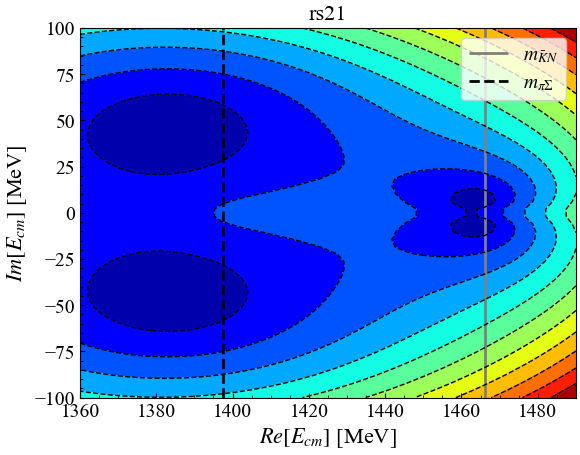

In [521]:
dim = 50
rew = range(1360, 1490, dim)
imw = range(-100, 100, dim)
a = [-1.6325762046840782, -1.7138485812778343, -2.9, -2.]
fig, ax = PyPlot.subplots()
plot_tdet_LO!(ax, rew, imw, params, a, n=4, μ_tuple=(630e0,), rs="rs21")

gcf()

In [525]:
pole_LO([1460e0, -10], params, a, rs="rs21", n=4)

2-element Vector{Float64}:
 1463.97
   -6.28

In [481]:
init_x1 = [1382e0, -45e0]
pole_LO_RS_2ch!(init_x1, params, a)

The routine was not converged.
The routine was not converged.


Row,RS,pole
,String,Any
1,rs11,"[NaN, NaN]"
2,rs21,"[1382.13, -45.11]"
3,rs12,"[NaN, NaN]"
4,rs22,"[1404.74, -111.38]"


In [526]:
init_x2 = [1477e0, -0e0]
pole_LO_RS_2ch!(init_x2, params, a, xtol=1e-9, ftol=1e-8)

The routine was not converged.
The routine was not converged.


Row,RS,pole
,String,Any
1,rs11,"[NaN, NaN]"
2,rs21,"[1471.13, 0.0]"
3,rs12,"[NaN, NaN]"
4,rs22,"[1465.96, 0.0]"


In [484]:

pole_LO(init_x1, params, [-2.2459623242004416,
-1.7668558956537128], rs="rs21", ftol=1e-6, xtol=1e-4)

2-element Vector{Float64}:
 1315.12
   -0.0

In [485]:
latt_para1 = copy(latt_para)
latt_para1[:decons_vec] = [92.4, 92.4, 92.4, 92.4] .* 1.15

4-element Vector{Float64}:
 106.26
 106.26
 106.26
 106.26

In [486]:
b = Dict(
    :b0 => -0.6208300893256031e-3,
    :bD => 0.0603969112334734e-3,
    :bF => -0.3479468364318576e-3
) 

Dict{Symbol, Float64} with 3 entries:
  :bD => 6.03969e-5
  :bF => -0.000347947
  :b0 => -0.00062083

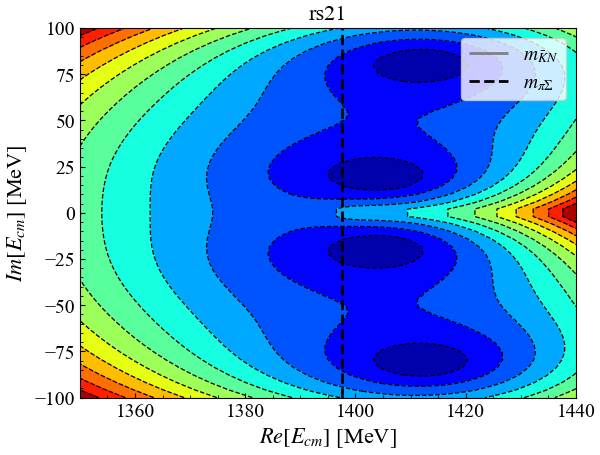

In [487]:
#b = Dict(:b0 => -0.43e-3, :bD => 0.08e-3, :bF => -0.27e-3)
d = Dict(:d1 => -0.36e-3, :d2 => 0.09e-3, :d3 => 0.1e-3, :d4 => -0.59e-3)

dim = 50
rew = range(1350, 1440, dim)
imw = range(-100, 100, dim)

aa2 = [-2, -2., -1.8, -2.7]
fig, ax = PyPlot.subplots()
plot_tdet_NLO(ax, rew, imw, latt_para1, aa2, b, d, n=2, rs="rs21")

gcf()